<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; text-align: left; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Jan Attig</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; font-size: 30px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; font-size: 30px; padding:0px;">Übungsblatt 6</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; font-size: 20px; padding:0px; margin-bottom: 20px;">Sommersemester 2020</h3>
<hr>

**Website** [http://www.thp.uni-koeln.de/trebst/Lectures/2020-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2020-CompPhys.shtml)

**Abgabe**:  1.6.2020 bis 13:00 Uhr

**Besprechung**:  3.6.2020 - 5.6.2020

**Name**: <font color="red">Bitte geben Sie ihren Namen an</font>

**Matrikelnummer**: <font color="red">Bitte geben Sie ihre Matrikelnummer an</font>

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; text-align: left; font-size: 25px; font-weight: bold; text-decoration: underline">Aufgaben auf Übungsblatt 6</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 15px"></td></tr></table>

- **Simulation einer Epidemie** [10 Punkte]
- Der heiße Draht [10 Punkte]
- (Bonus) Heiße Neutronen [8 Bonus-Punkte]


<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; text-align: left; font-size: 25px; font-weight: bold; text-decoration: underline">Simulation einer Epidemie</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 15px">[10 Punkte]</td></tr></table>

Um die Ausbreitung der Covid-19 Epidemie innerhalb einer Gesellschaft sowie die Vorzüge von "social distancing" zu illustrieren, veröffentlichte die Washington Post am 14. März 2020 eine illustrative, numerische Modell-Simulation ([hier](https://www.washingtonpost.com/graphics/2020/world/corona-simulator/) zu finden). Im Laufe der folgenden Tage verbreitete sich diese Darstellung um die ganze Welt, wurde millionenfach geteilt, und auch in Deutschland aufgegriffen, wie etwa in [diesem Bericht](https://www.spiegel.de/wissenschaft/medizin/coronavirus-und-flattenthecurve-was-bringt-social-distancing-a-86bcfa52-06b7-4fc1-9514-d21a3a975e7b) des Spiegel vom 20. März 2020.

[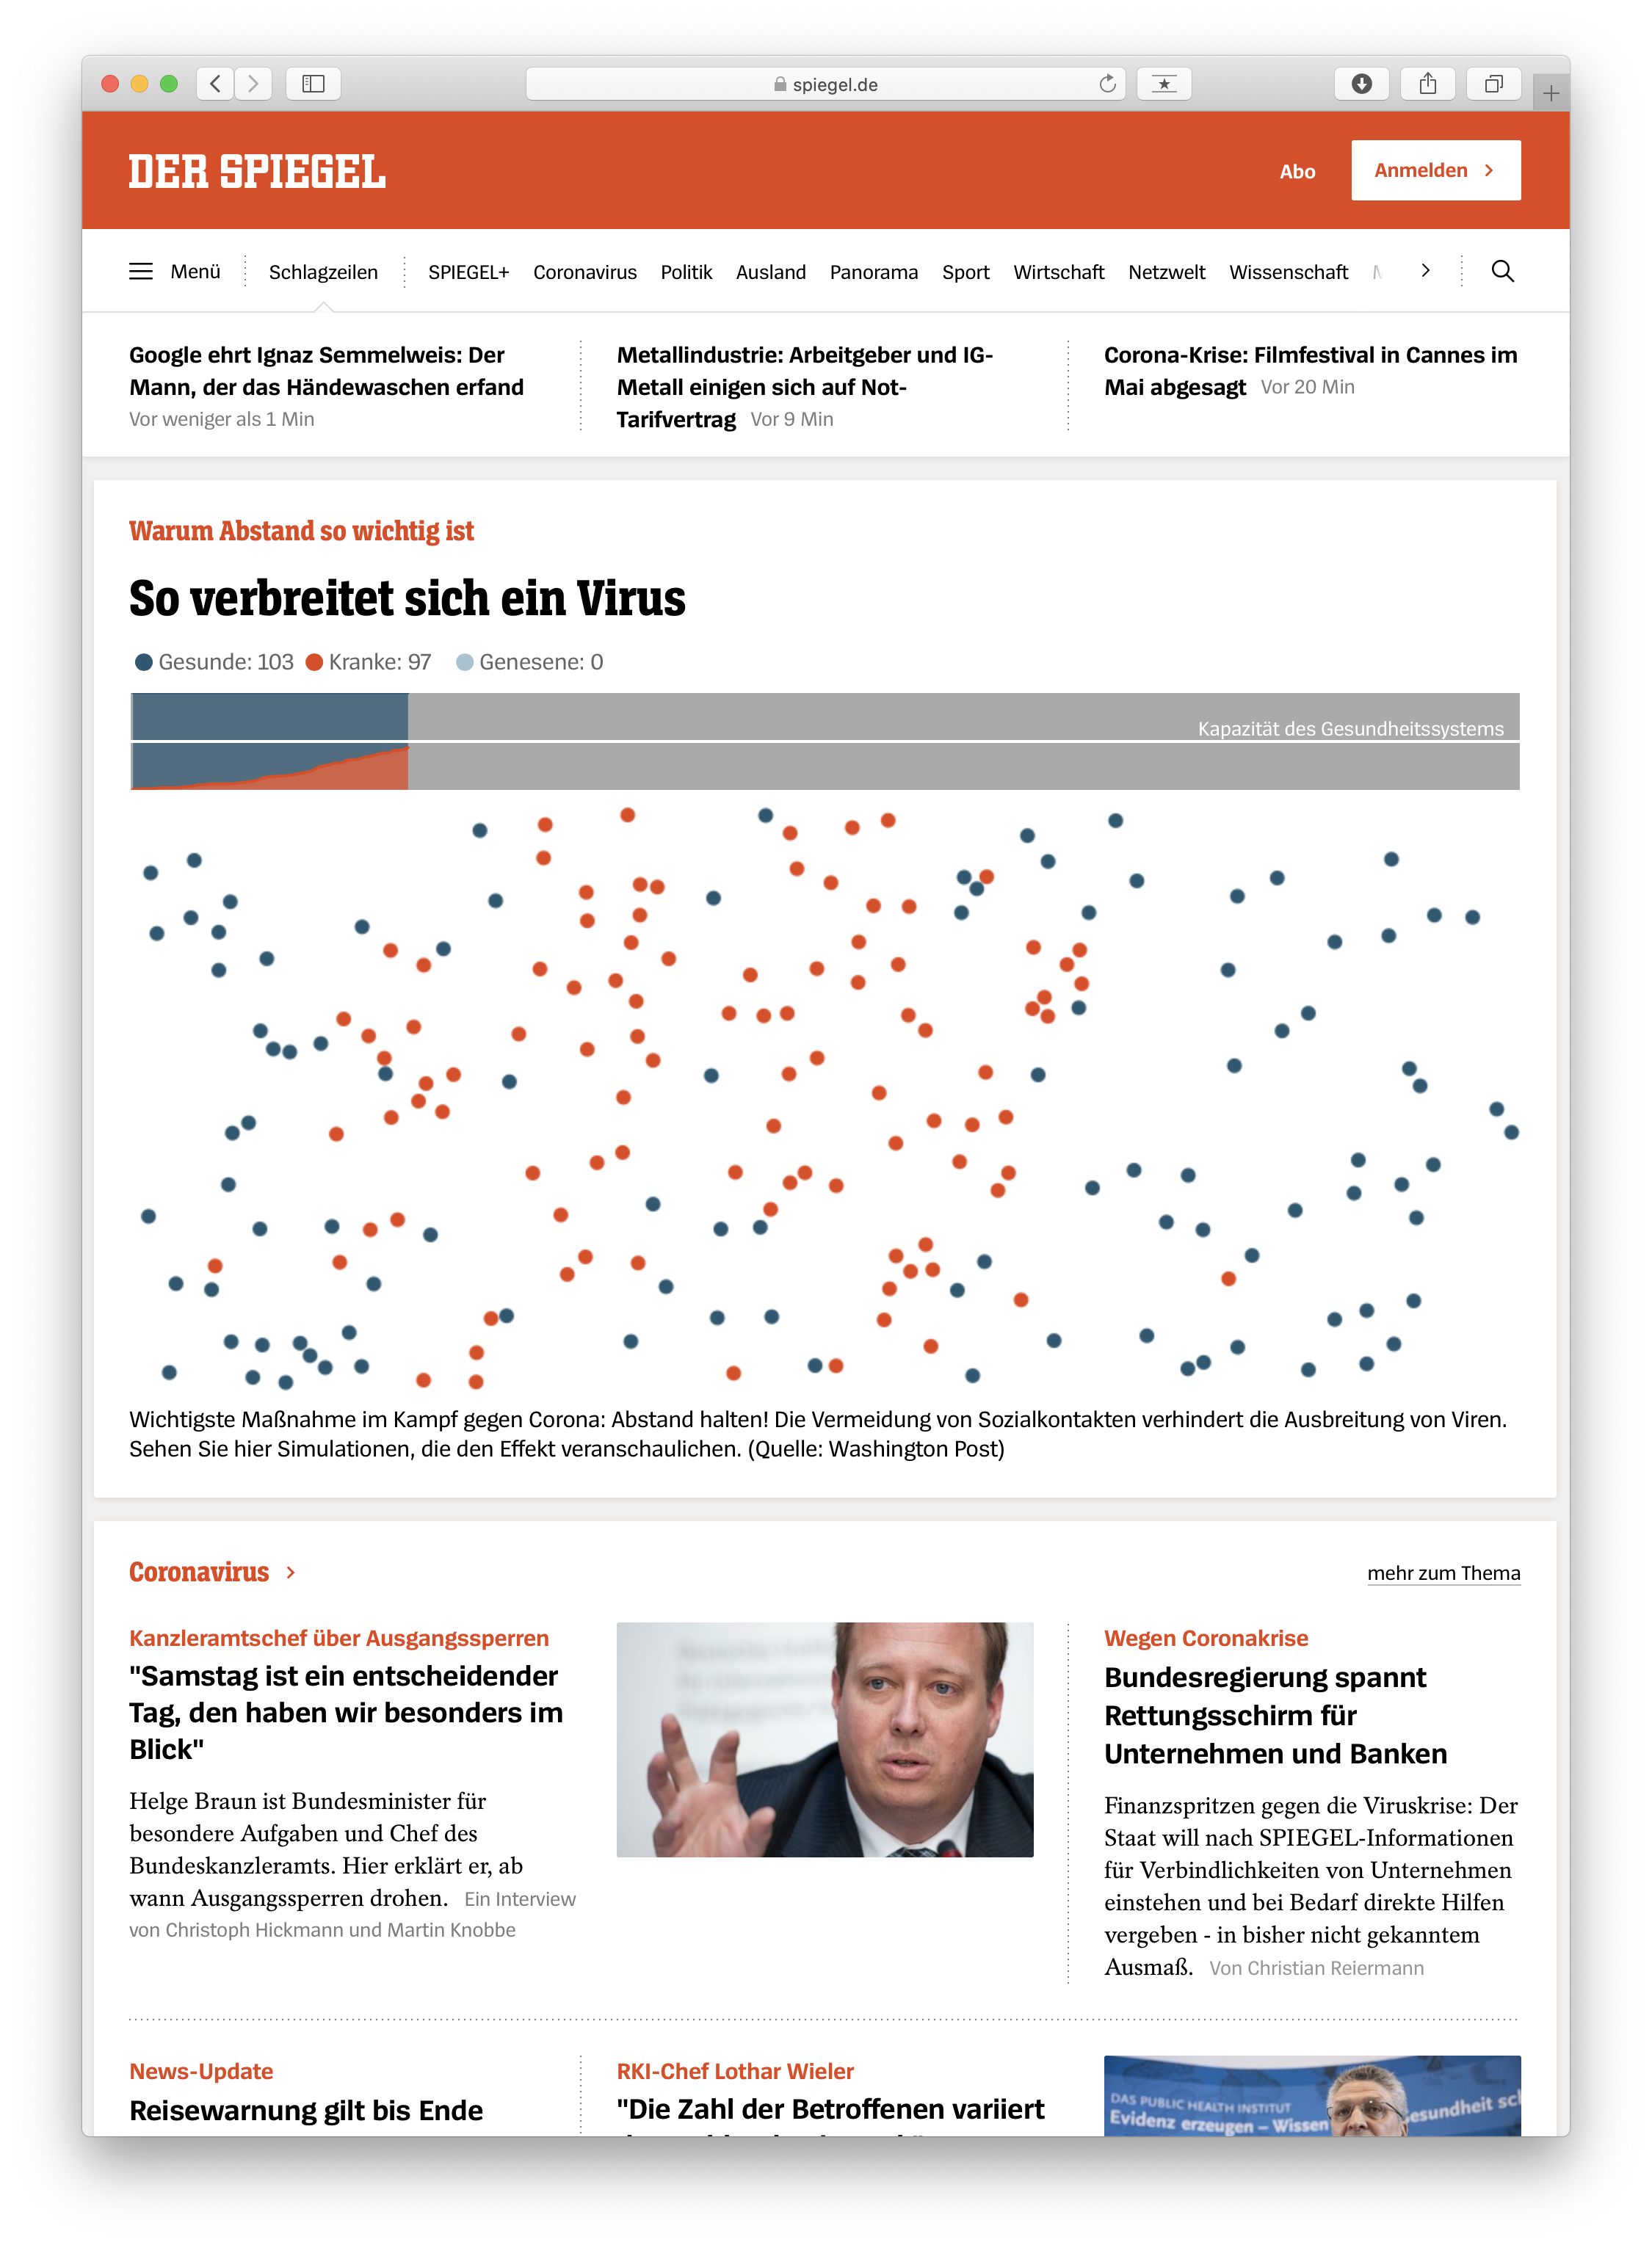](https://www.spiegel.de/wissenschaft/medizin/coronavirus-und-flattenthecurve-was-bringt-social-distancing-a-86bcfa52-06b7-4fc1-9514-d21a3a975e7b)


Im Kern bestehen diese Modell-Simulationen aus der ungeordneten Bewegung einzelner Teilchen, welche sich entweder mit einem fiktiven Virus infiziert haben, dagegen bereits Antikörper gebildet haben und daher immun sind, oder keines der beiden Merkmale besitzen. In der Epidemologie spricht man in diesem Zusammenhang von sogenannten [SIR-Modellen](https://de.wikipedia.org/wiki/SIR-Modell) (für *susceptible*, *infected* und *recovered*). An den Simulationen lassen sich modellhaft die Auswirkungen verschiedener Bewegungsbeschränkungen einzelner Teilchens auf die globale Verbreitung des Virus darstellen.

Im Kontext dieser Aufgabe möchten wir Ihnen einen vollständigen Code für ein einfaches Agenten-basiertes SIR-Modell zur Verfügung stellen, mit dessen Parametern Sie experimentieren können, und anhand dessen Sie den Effekt eines  "lock downs" auf die Verbreitung des Modell-Virus untersuchen können. Für eine genauere Darstellung mit noch mehr Effekten möchten wir erneut auf ein [Video](https://www.youtube.com/watch?v=gxAaO2rsdIs) des YouTubers *3Blue1Brown* verweisen. 

### a) Code ausführen und kommentieren

Führen Sie den nachfolgenden Code aus. Sie können den Einfluss der Parameter in der letzten Notebook-Zelle auf die Geschwindigkeit, Dauer und Heftigkeit der Infektionswelle untersuchen. 

Im Code wurden alle Leer- und Kommentarzeilen entfernt. Stellen Sie diese wieder her, indem Sie den Code kommentieren und mit Leerzeilen logische Blöcke voneinander trennen. Schreiben Sie auch für jede einzelne Notebook-Zelle einen kleinen Überschriften-Block.

*Hinweis:* Bitte beachten Sie, dass auch zu viele Kommentare nicht der richtige Weg sind. Versuchen Sie, eine angemessene Anzahl an beschreibenden Kommentar-Zeilen zu finden, so dass die wesentlichen Funktionen des Codes klar werden und nichts wichtiges ausgelassen wird.

In [ ]:
using LinearAlgebra
using PyPlot
using Random
pygui(true)

In [ ]:
const x_left  = 0;
const x_right = 2;
const y_down  = 0;
const y_up    = 1;
const r = 0.01;
const v = 1;
const TIME_INFECTED = 3;
const STATE_SUSCEPTIBLE = 1;
const STATE_INFECTED    = -1;
const STATE_RECOVERED   = 0;
const COLOR_SUSCEPTIBLE = (0.3,0.3,1.0, 1);
const COLOR_INFECTED    = (1.0,0.2,0.2, 1);
const COLOR_RECOVERED   = (0.8,0.8,1.0, 1);

In [ ]:
function initialize(N :: Integer)
    x  = zeros(N)
    y  = zeros(N)
    vx = zeros(N)
    vy = zeros(N)
    m  = zeros(N)
    s  = zeros(N)
    st = zeros(N)
    for i in 1:N
        overlapping = true
        while overlapping
            x[i] = x_left+2*r + rand()*(x_right - x_left - 4*r)
            y[i] = y_down+2*r + rand()*(y_up - y_down - 4*r)
            overlapping = false
            for j in 1:i-1
                if (x[i]-x[j])^2 + (y[i]-y[j])^2 < 8*r^2
                    overlapping = true
                end
            end
        end
        angle = rand()*2*pi
        vx[i] = cos(angle)*v
        vy[i] = sin(angle)*v
        m[i]  = 1
        s[i]  = STATE_SUSCEPTIBLE
        st[i] = 0.0
    end
    return x,y,vx,vy,m,s,st
end

In [ ]:
function iterate_particles!(x,y, vx,vy, m,s,st, t, dt)
    x .+= vx .* dt
    y .+= vy .* dt
    for i in 1:length(x)
        for j in 1:i-1
            if (x[i]-x[j])^2 + (y[i]-y[j])^2 < 4*r^2
                collide_particles!(x,y, vx,vy, m,s,st, t, i,j)
            end
        end
    end
    for i in 1:length(x)
        if x[i]-r < x_left
            vx[i] = abs(vx[i])
        elseif x[i]+r > x_right
            vx[i] = -abs(vx[i])
        end
        if y[i]-r < y_down
            vy[i] = abs(vy[i])
        elseif y[i]+r > y_up
            vy[i] = -abs(vy[i])
        end
    end
    for i in 1:length(x)
        if s[i] == STATE_INFECTED && t-st[i] > TIME_INFECTED
            s[i]  = STATE_RECOVERED
            st[i] = t
        end
    end
end

In [ ]:
function collide_particles!(x,y, vx,vy, m,s,st, t, i, j)
    e_r = [x[j]-x[i], y[j]-y[i]]
    e_r = e_r ./ norm(e_r)
    v_i = e_r[1]*vx[i] + e_r[2]*vy[i]
    v_j = e_r[1]*vx[j] + e_r[2]*vy[j]
    v_i_p = 2*(m[i]*v_i + m[j]*v_j)/(m[i]+m[j])  -  v_i
    v_j_p = 2*(m[i]*v_i + m[j]*v_j)/(m[i]+m[j])  -  v_j
    vx[i] = vx[i] + (v_i_p - v_i)*e_r[1]
    vy[i] = vy[i] + (v_i_p - v_i)*e_r[2]
    vx[j] = vx[j] + (v_j_p - v_j)*e_r[1]
    vy[j] = vy[j] + (v_j_p - v_j)*e_r[2]
    if s[i] == STATE_INFECTED && s[j] == STATE_SUSCEPTIBLE
        s[j]  = STATE_INFECTED
        st[j] = t
    elseif s[j] == STATE_INFECTED && s[i] == STATE_SUSCEPTIBLE
        s[i]  = STATE_INFECTED
        st[i] = t
    end
end

In [ ]:
N                = 150
t_max            = TIME_INFECTED * 7
lockdown_amount  = 0.95
lockdown_t_start = TIME_INFECTED * 0.1
lockdown_t_end   = TIME_INFECTED * 2.1

x,y,vx,vy,m,s,st = initialize(N)
s .= STATE_SUSCEPTIBLE
indices = shuffle(1:N)
s[indices[end]] = STATE_INFECTED

dt = 0.01
times = 0:dt:t_max
substeps = 100

i_start = 0
i_end   = 0
for i in 1:length(times)
    if abs(times[i]-lockdown_t_start) < dt*2
        i_start = i
    end
    if abs(times[i]-lockdown_t_end) < dt*2
        i_end = i
    end
end


figure(figsize=(10,6.5))

axes_timeline = subplot2grid((6, 10), (0, 0), colspan=10)
xlim(0, t_max)
ylim(1,N)
axvline(lockdown_t_start, color="k")
axvline(lockdown_t_end,   color="k")
yticks([],[])
xticks([],[])
xlabel("time")
number_susceptible = zeros(Int64, length(times))
number_infected    = zeros(Int64, length(times))
number_recovered   = zeros(Int64, length(times))
line_data_susceptible = axes_timeline.fill_between(times, number_infected, number_susceptible.+number_infected, color=COLOR_SUSCEPTIBLE)
line_data_recovered   = axes_timeline.fill_between(times, number_susceptible.+number_infected, number_susceptible.+number_infected.+number_recovered, color=COLOR_RECOVERED)
line_data_infected    = axes_timeline.fill_between(times, zeros(Int64, length(times)), number_infected, color=COLOR_INFECTED)

subplot2grid((6, 10), (1, 0), rowspan=5, colspan=10)
points_susceptible, = plot(x[s.==STATE_SUSCEPTIBLE],y[s.==STATE_SUSCEPTIBLE],   linestyle="", marker=".", ms=10, color=COLOR_SUSCEPTIBLE)
points_infected,    = plot(x[s.==STATE_INFECTED],y[s.==STATE_INFECTED], linestyle="", marker=".", ms=10, color=COLOR_INFECTED)
points_recovered,   = plot(x[s.==STATE_RECOVERED],y[s.==STATE_RECOVERED],     linestyle="", marker=".", ms=10, color=COLOR_RECOVERED)
xlim(x_left, x_right)
ylim(y_down, y_up)
gca().set_facecolor((0.9,0.9,0.9))
xticks([],[])
yticks([],[])
gca().set_aspect("equal")
#axis("off")
tight_layout()

for (i,t) in enumerate(times)
    if i == i_start
        # make some particles inert
        for i in indices[1:round(Int64, floor(N*lockdown_amount))]
            # make mass very big = inert
            m[i] = 1e6
            # slow down particle
            vx[i] = 0
            vy[i] = 0
        end
    end
    if i == i_end
        # make all particles light again
        m .= 0.5
    end
    for j in 0:substeps-1
        iterate_particles!(x,y,vx,vy,m,s,st,t + j*dt/substeps, dt/substeps)
    end
    points_susceptible.set_data(x[s.==STATE_SUSCEPTIBLE],y[s.==STATE_SUSCEPTIBLE])
    points_infected.set_data(x[s.==STATE_INFECTED],y[s.==STATE_INFECTED])
    points_recovered.set_data(x[s.==STATE_RECOVERED],y[s.==STATE_RECOVERED])
    number_susceptible[i] = length(x[s.==STATE_SUSCEPTIBLE])
    number_infected[i] = length(x[s.==STATE_INFECTED])
    number_recovered[i] = length(x[s.==STATE_RECOVERED])
    if i%2 == 0
        for i in 1:3
            axes_timeline.collections[1].remove()
        end
        line_data_susceptible  = axes_timeline.fill_between(times, number_infected, number_susceptible.+number_infected, color=COLOR_SUSCEPTIBLE)
        line_data_recovered   = axes_timeline.fill_between(times, number_susceptible.+number_infected, number_susceptible.+number_infected.+number_recovered, color=COLOR_RECOVERED)
        line_data_infected = axes_timeline.fill_between(times, zeros(Int64, length(times)), number_infected, color=COLOR_INFECTED)
    end
    pause(0.01)
    if length(get_fignums()) == 0
        println("window closed")
        break
    end    
end

### b) Zweiter Lockdown

Ergänzen Sie oben stehende Zelle so, dass es einen *zweiten*, zeitlich versetzten lock down gibt, in dem eine gewisse Anzahl Partikel fest stehen bleiben. Gehen Sie analog zum ersten lock down vor, der bereits implementiert ist, und ergänzen Sie ebenfalls Parameter für einen zweiten Lockdown.